In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('/content/drive', force_remount=True)

unset HISTFILE; export PS1="root@23519a883811-b2c58bb78e87400db2a178ddbc66a4be: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@23519a883811-b2c58bb78e87400db2a178ddbc66a4be: umount -f /content/drive || umount /content/drive; pkill -9 -x drive
umount: /content/drive: no mount point specified.
umount: /content/drive: no mount point specified.
root@23519a883811-b2c58bb78e87400db2a178ddbc66a4be: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@23519a883811-b2c58bb78e87400db2a178ddbc66a4be: ( while `sleep 0.5`; do if [[ -d "/content/drive" && "$(ls -A /content/drive)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 185
root@23519a883811-b2c58bb78e87400db2a178ddbc66a4be: ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task_instances:10,opendir_timeout_ms:120000,virtual_folders_

In [3]:
import os
os.chdir('./drive/MyDrive/따릉이예측분석')

In [4]:
# 데이터 불러오기
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
train

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
1,2018-01-02,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2,2018-01-03,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
3,2018-01-04,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
4,2018-01-05,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2020-12-27,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103
1091,2020-12-28,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912
1092,2020-12-29,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747
1093,2020-12-30,NaN,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488


In [6]:
test

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max
0,2021-01-01,NaN,-4.2,1.6,-9.8,30.0,17.0,64.0,6.5,67.7,2.0,4.1
1,2021-01-02,NaN,-5.0,-1.4,-8.4,34.0,12.0,38.5,9.0,93.8,2.6,5.4
2,2021-01-03,NaN,-5.6,-2.0,-9.1,39.0,14.0,45.0,5.5,56.7,2.0,4.5
3,2021-01-04,0.0,-3.5,0.3,-8.4,40.0,23.0,51.4,4.6,47.4,1.7,3.2
4,2021-01-05,0.0,-5.5,-2.1,-9.9,30.0,17.0,52.8,8.6,88.7,2.9,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,0.0,-7.6,-3.9,-12.9,33.0,20.0,60.9,3.8,39.6,1.7,3.1
361,2021-12-28,NaN,-4.1,-0.9,-8.5,51.0,38.0,73.8,1.7,17.7,2.2,3.1
362,2021-12-29,0.2,0.4,5.9,-3.8,66.0,49.0,72.9,1.8,18.8,2.6,5.9
363,2021-12-30,0.0,-3.9,0.2,-6.8,30.0,17.0,48.5,7.3,76.0,3.3,6.6


## 가설 설정
1. 따릉이 대여 횟수는 날씨와 시간에 큰 영향을 받을 것이다.
2. 일조율이 클수록 대여횟수도 많을 것이다. 
3. 바람이 강한 날씨와 강수량이 많은 날씨에는 대여 횟수가 적을 것이다.


### 산점도 확인
1. 햇빛이 대여 횟수에 영향을 미치는지 확인
2. 바람의 세기가 대여 횟수에 영향을 미치는지 확인
3. 비가 오는 날의 대여 횟수 확인
4. 시간대(PM10, PM2.5)에 따른 대여 횟수 확인

In [7]:
train.head()

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
1,2018-01-02,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2,2018-01-03,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
3,2018-01-04,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
4,2018-01-05,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705


In [8]:
train.tail()

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
1090,2020-12-27,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103
1091,2020-12-28,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912
1092,2020-12-29,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747
1093,2020-12-30,NaN,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488
1094,2020-12-31,0.0,-8.9,-5.0,-12.9,28.0,12.0,53.9,6.0,62.5,2.4,4.2,24535


In [9]:
train.shape

(1095, 13)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1095 non-null   object 
 1   precipitation  417 non-null    float64
 2   temp_mean      1095 non-null   float64
 3   temp_highest   1095 non-null   float64
 4   temp_lowest    1095 non-null   float64
 5   PM10           1028 non-null   float64
 6   PM2.5          1027 non-null   float64
 7   humidity       1095 non-null   float64
 8   sunshine_sum   1090 non-null   float64
 9   sunshine_rate  1095 non-null   float64
 10  wind_mean      1095 non-null   float64
 11  wind_max       1095 non-null   float64
 12  rental         1095 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 111.3+ KB


In [11]:
train.columns

Index(['date', 'precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
       'PM10', 'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate',
       'wind_mean', 'wind_max', 'rental'],
      dtype='object')

In [12]:
# 앞의 값으로 결측값 대체하기
train.fillna(method = 'ffill')

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
1,2018-01-02,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2,2018-01-03,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
3,2018-01-04,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
4,2018-01-05,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2020-12-27,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103
1091,2020-12-28,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912
1092,2020-12-29,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747
1093,2020-12-30,0.2,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488


앞의 값이나 뒤의 값으로 결측값을 대체하면 앞부분에 있는 결측값을 채울 수 없어 평균으로 결측값을 대체할 것이다.

In [13]:
# 평균으로 결측값 대체하기
train_0 = train.fillna(train.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [14]:
train_0

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,9.169544,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
1,2018-01-02,9.169544,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2,2018-01-03,9.169544,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
3,2018-01-04,9.169544,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
4,2018-01-05,9.169544,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2020-12-27,0.000000,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103
1091,2020-12-28,1.300000,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912
1092,2020-12-29,0.200000,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747
1093,2020-12-30,9.169544,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488


In [15]:
train_0.describe()

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,9.169544,13.279726,18.131507,9.181918,36.051556,21.532619,59.166301,6.776697,56.263288,2.013607,4.359635,48312.185388
std,11.062040,10.470287,10.564244,10.644636,19.379409,13.198584,15.679415,3.965992,32.828707,0.679100,1.186847,29955.018767
min,0.000000,-14.800000,-10.700000,-17.800000,5.000000,2.000000,17.900000,0.000000,0.000000,0.600000,1.600000,1037.000000
25%,4.700000,4.600000,9.150000,0.400000,23.000000,13.000000,47.600000,3.300000,25.700000,1.600000,3.500000,23984.000000
50%,9.169544,13.800000,19.600000,9.000000,34.000000,20.000000,58.800000,7.900000,66.700000,1.900000,4.200000,41970.000000
75%,9.169544,22.600000,27.050000,18.850000,44.000000,26.000000,69.500000,9.700000,86.400000,2.400000,5.000000,74803.500000
max,103.100000,33.700000,39.600000,30.300000,171.000000,124.000000,97.000000,13.600000,95.900000,4.800000,9.800000,118921.000000


In [16]:
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')
plt.rcParams['font.size'] = 15

Text(0.5, 1.0, 'rental')

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


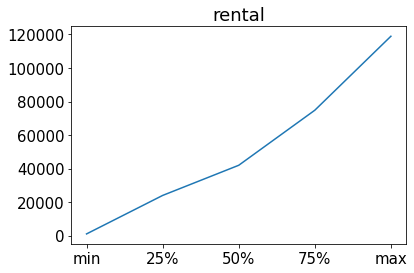

In [17]:
data = train_0.describe().loc['min':'max', 'rental']
plt.plot(data)
plt.title('rental')

In [18]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,799 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [19]:
import matplotlib
matplotlib.rcParams['font.family'] = 'NanumSquare'
matplotlib.rcParams['font.size'] = 15

Text(0.5, 1.0, '따릉이 대여 횟수')

findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

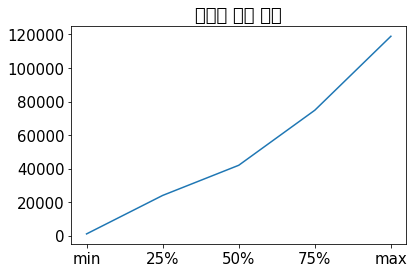

In [20]:
data = train_0.describe().loc['min':'max', 'rental']
plt.plot(data)
plt.title('따릉이 대여 횟수')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54943 missing from current font.
  font.set_

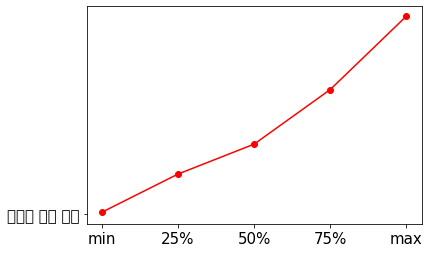

In [21]:
data = train_0.describe().loc['min':'max', 'rental']

plt.plot(data, color = 'red', marker = 'o')
plt.plot('따릉이 대여 횟수')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text

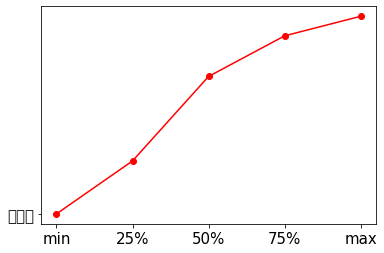

In [22]:
data = train_0.describe().loc['min':'max', 'sunshine_rate']

plt.plot(data, color = 'red', marker = 'o')
plt.plot('일조율')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_

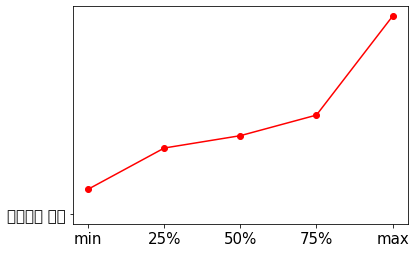

In [23]:
data = train_0.describe().loc['min':'max', 'wind_mean']

plt.plot(data, color = 'red', marker = 'o')
plt.plot('바람세기 평균')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


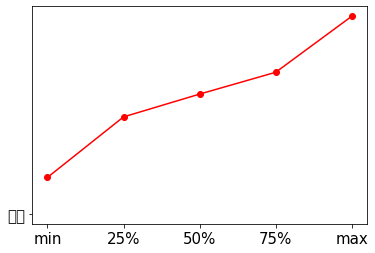

In [24]:
data = train_0.describe().loc['min':'max', 'humidity']

plt.plot(data, color = 'red', marker = 'o')
plt.plot('습도')

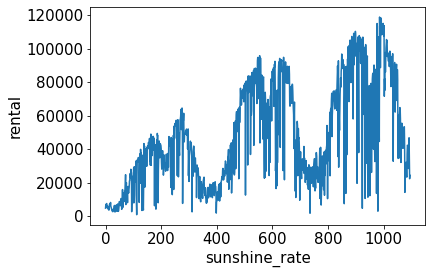

In [25]:
plt.plot(train_0['rental'])

plt.ylabel('rental')
plt.xlabel('sunshine_rate')
plt.show()

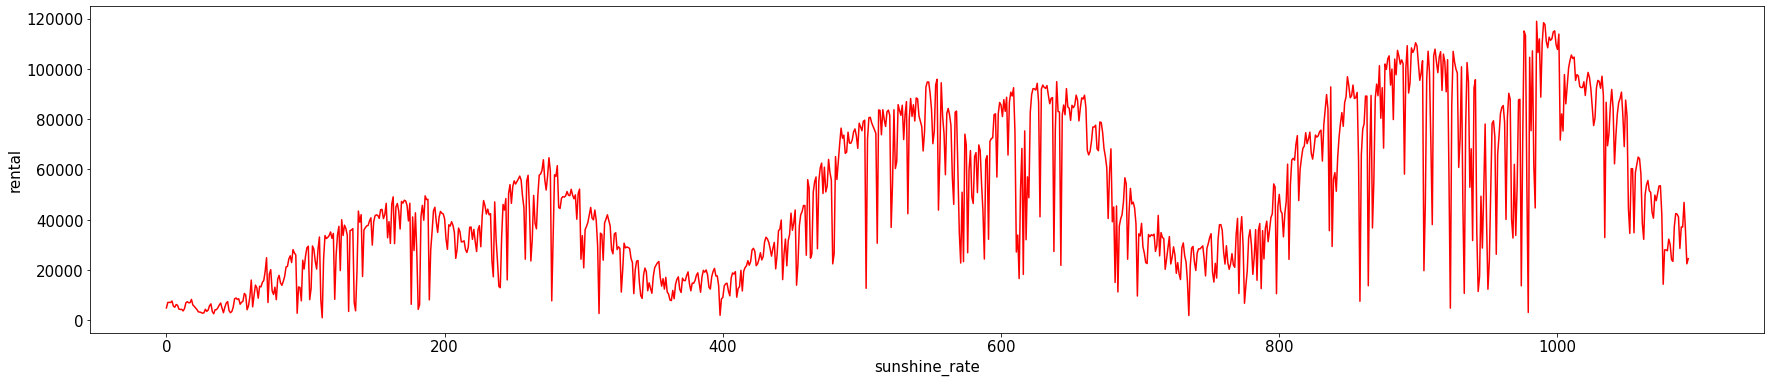

In [26]:
# 대여 횟수와 일조량 관계
plt.figure(figsize=(30,6))

plt.plot(train_0['rental'], color='red')

plt.ylabel('rental')
plt.xlabel('sunshine_rate')
plt.show()

일조량만 대여횟수에 영향을 미쳤다고 할 수는 없다고 추측된다.

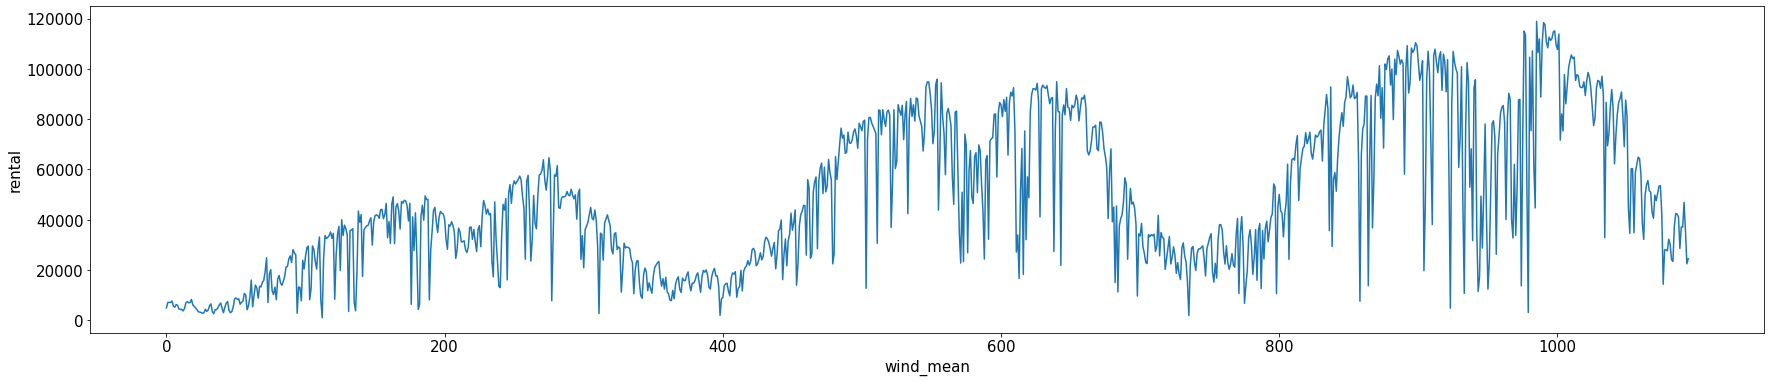

In [27]:
# 대여 횟수와 바람 세기 평균 관계
plt.figure(figsize=(30,6))

plt.plot(train_0['rental'])

plt.ylabel('rental')
plt.xlabel('wind_mean')
plt.show()

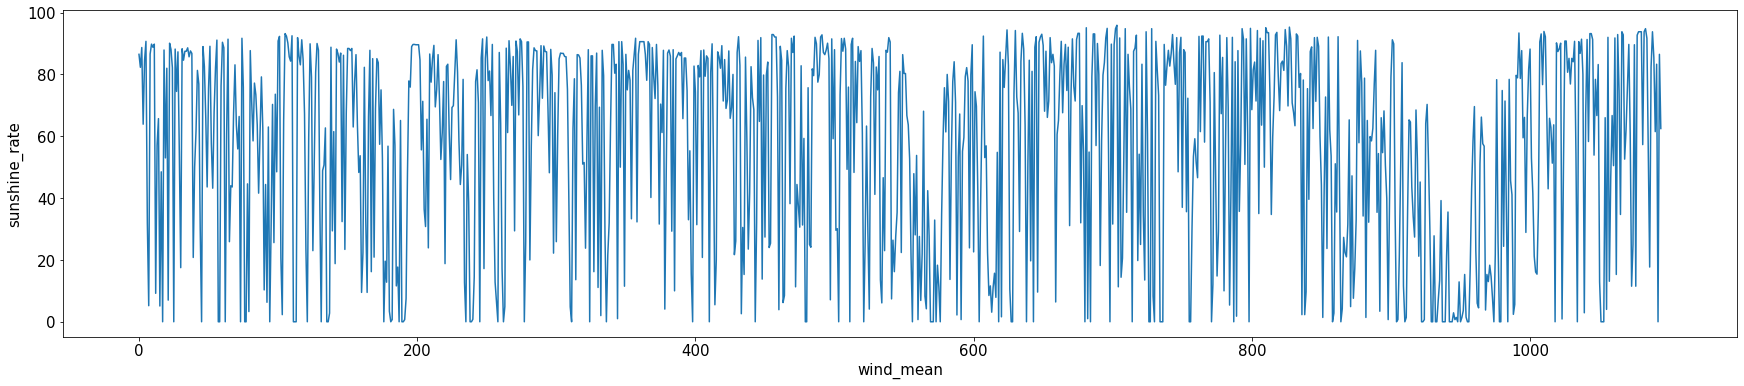

In [28]:
# 일조량과 바람 세기 평균 관계
plt.figure(figsize=(30,6))

plt.plot(train_0['sunshine_rate'])

plt.ylabel('sunshine_rate')
plt.xlabel('wind_mean')
plt.show()

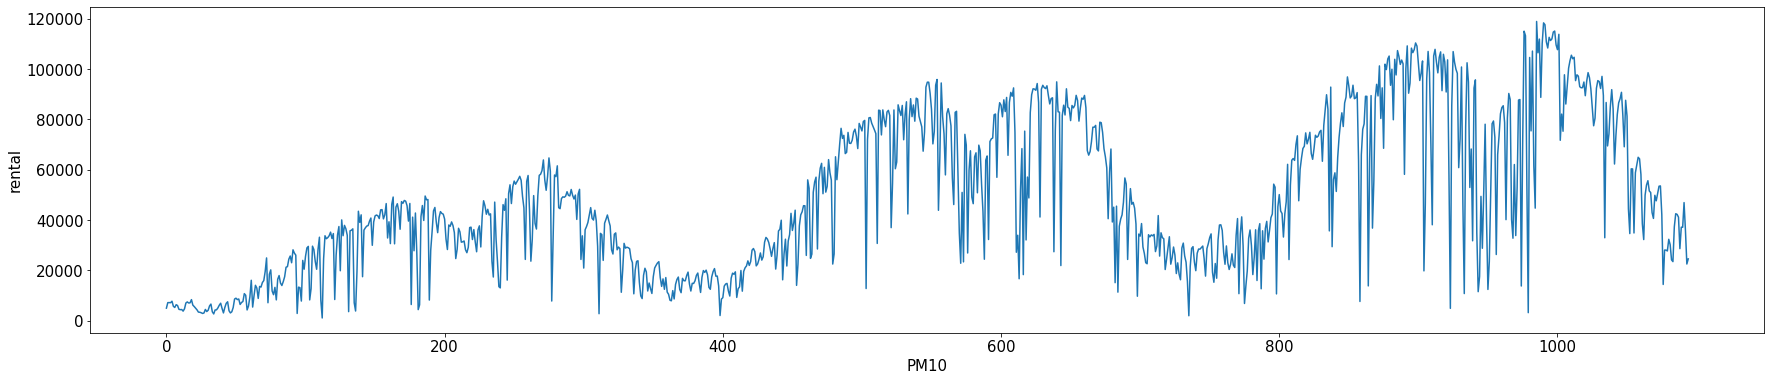

In [29]:
# 대여 횟수와 PM10 시간대 관계
plt.figure(figsize=(30,6))

plt.plot(train_0['rental'])

plt.ylabel('rental')
plt.xlabel('PM10')
plt.show()

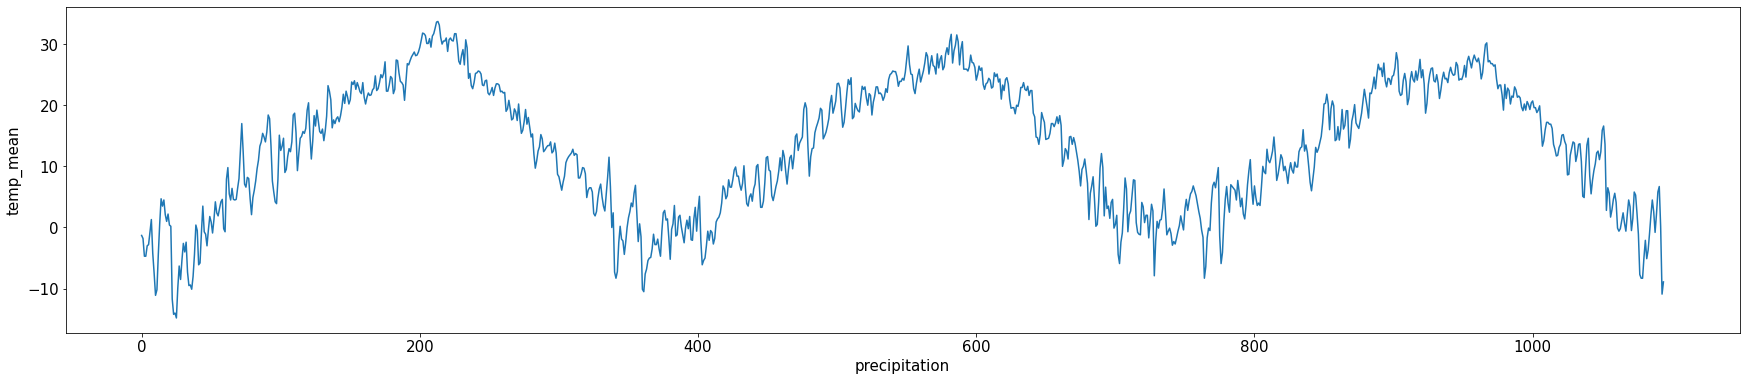

In [30]:
# 온도 평균과 강수량 관계
plt.figure(figsize=(30,6))

plt.plot(train_0['temp_mean'])

plt.ylabel('temp_mean')
plt.xlabel('precipitation')
plt.show()

1. 대여 횟수는 일조량에 영향을 받을 것이다.

Text(0.5, 0, '일조량')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text

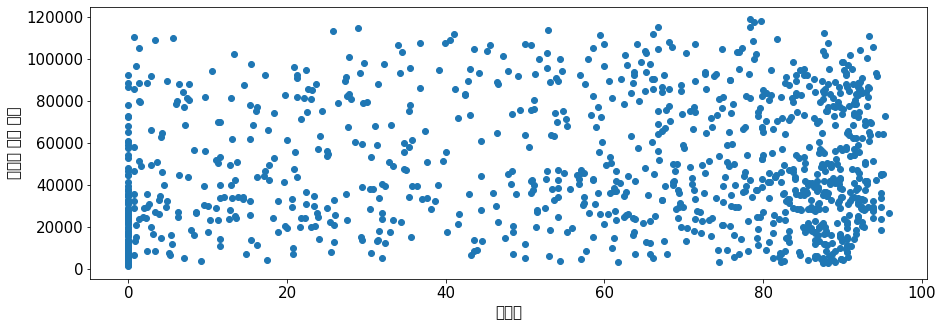

In [31]:
plt.figure(figsize=[15,5])

plt.scatter(x = train_0['sunshine_rate'], y = train_0['rental'])

plt.ylabel('따릉이 대여 횟수')
plt.xlabel('일조량')

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
sunshine_rate_model = DecisionTreeRegressor()

In [34]:
sunshine_rate_count = train_0['sunshine_rate']
train_feature = train_0[['rental']]
test_feature = test[['sunshine_rate']]

In [35]:
sunshine_rate_model.fit(train_feature, sunshine_rate_count)

DecisionTreeRegressor()

In [36]:
sunshine_rate_count_predict = sunshine_rate_model.predict(train_feature)
print(sunshine_rate_count_predict)
sunshine_rate_count_predict.shape

[86.5 82.3 88.7 ...  0.  86.5 62.5]


(1095,)

In [37]:
sample_submission['rental'] = sunshine_rate_count_predict[:365]
sample_submission.to_csv('submission1.csv', index=False)

In [38]:
submission1 = pd.read_csv('submission1.csv')

In [40]:
rental_model = DecisionTreeRegressor()

In [41]:
rental_count = train_0['rental']
train_feature = train_0[['sunshine_rate']]
test_feature = test[['sunshine_rate']]

In [ ]:
rental_model.fit(train_feature, rental_count)

In [43]:
rental_count_predict = rental_model.predict(train_feature)
print(rental_count_predict)

[24927.875      31479.66666667  9768.         ... 25811.46391753
 24927.875      45875.66666667]


In [44]:
sample_submission['rental'] = rental_count_predict[:365]
sample_submission.to_csv('submission2.csv', index=False)

2. 강수량이 많아지면 대여 횟수가 줄어들 것이다.